# Homework 3 Learning, Inference, Decisions
### Nikhil Pereira nmp54
### March 16th, 2022


In [4]:
import numpy as np
import warnings
import math
warnings.filterwarnings('ignore')

## Problem 1

### 1A
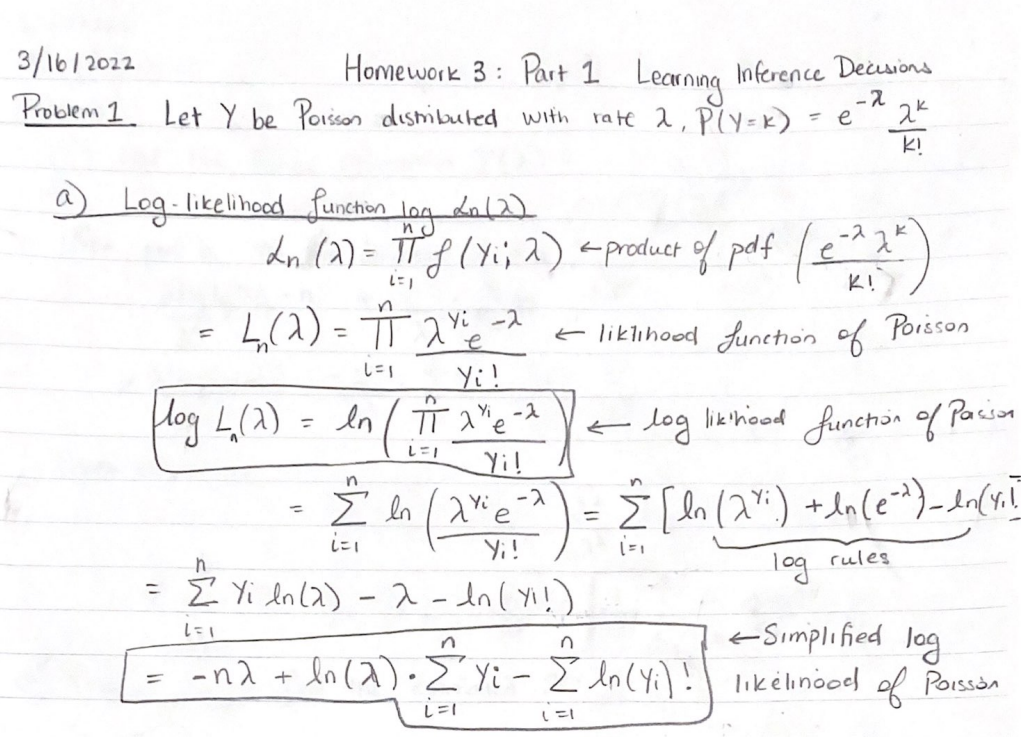

### 1B
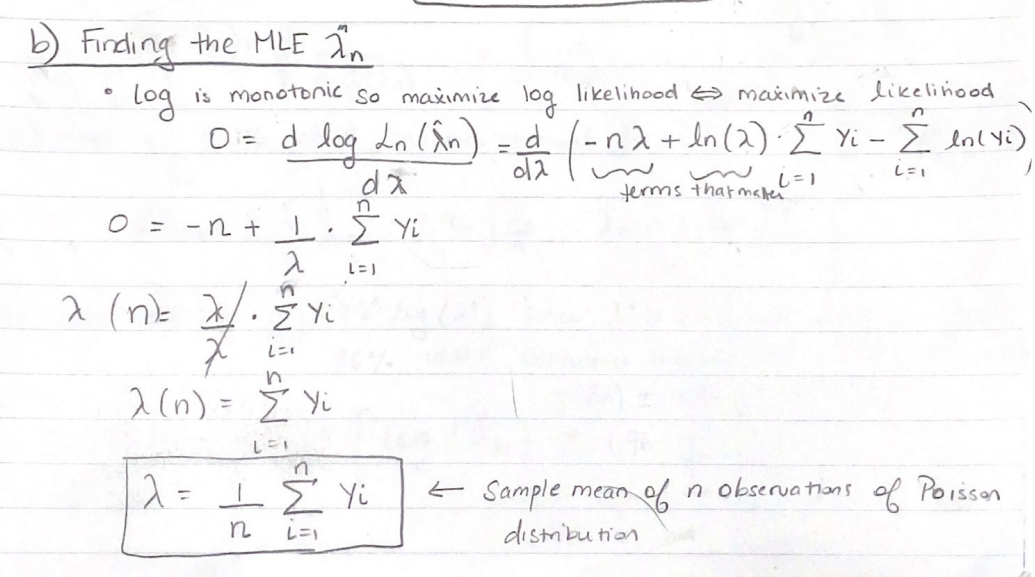

### 1C, 1D, 1E 
##### (For the fisher information calculation I am using the Expectation of the second derivative of MLE Referencing the approach in this article)

Reference: https://people.missouristate.edu/songfengzheng/Teaching/MTH541/Lecture%20notes/Fisher_info.pdf

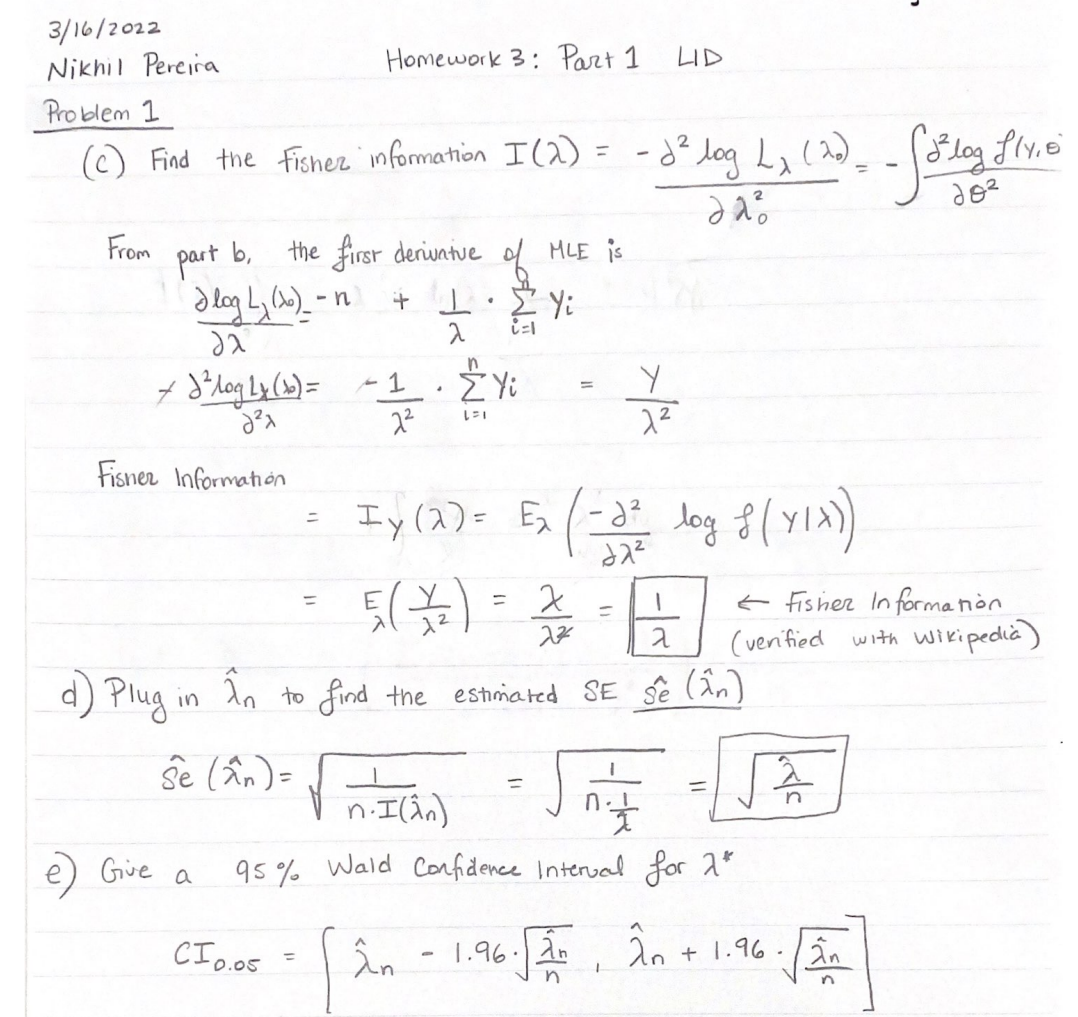

### 1F

In [5]:
lambda_star = 2
n = 20
outside_interval = 0
lower_E = []
upper_E = []
for _ in range(1000):
    poissons = np.random.poisson(lambda_star, n)
    theta_hat = np.mean(poissons)
    se_hat = np.sqrt(theta_hat/n)
    lower_CI = theta_hat-1.96*se_hat
    upper_CI = theta_hat+1.96*se_hat
    if lambda_star < lower_CI or lambda_star > upper_CI:
        outside_interval +=1
    lower_E.append(lower_CI)
    upper_E.append(upper_CI)
print('Average Wald 95pct CI = [%f,%f]'%(np.mean(lower_E),np.mean(upper_E)))
print('Width 95pct CI = [%f]'%(np.absolute(np.mean(lower_E)-np.mean(upper_E))))
print('Number of times lambda* fell outside interval = ', outside_interval)
type1Error = outside_interval/1000
print('Type I Error Rate for this experiment is= ', type1Error, 'with a difference of ', np.round(np.absolute(0.05 - type1Error),4))

Average Wald 95pct CI = [1.381049,2.616251]
Width 95pct CI = [1.235202]
Number of times lambda* fell outside interval =  52
Type I Error Rate for this experiment is=  0.052 with a difference of  0.002


### 1G
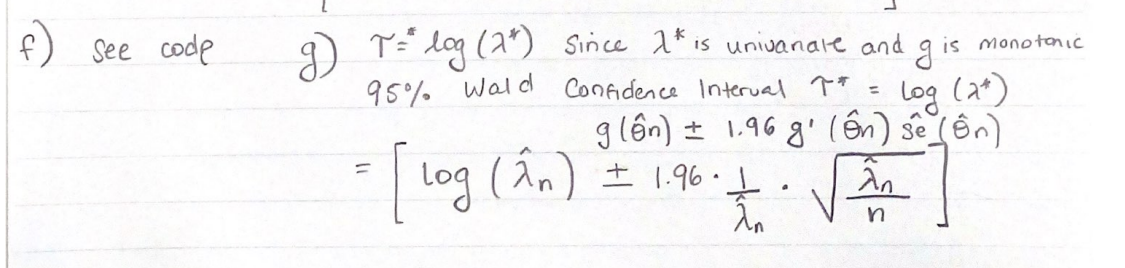

### 1H

In [13]:
lambda_star = np.log(2)
n = 20
outside_interval = 0
lower = []
upper = []
for _ in range(1000):
    poissons = np.random.poisson(2, n)
    theta_hat = np.mean(poissons)
    log_theta_hat = np.log(theta_hat)
    se_hat = np.sqrt(theta_hat/n)
    lower_CI = log_theta_hat-(1.96*(1/theta_hat)*se_hat)
    upper_CI = log_theta_hat+(1.96*(1/theta_hat)*se_hat)
    if lambda_star < lower_CI or lambda_star > upper_CI:
        outside_interval +=1
    lower.append(lower_CI)
    upper.append(upper_CI)
print('Average Wald 95pct CI = [%f,%f]'%(np.mean(lower),np.mean(upper)))
print('Width 95pct CI = [%f]'%(np.absolute(np.mean(lower)-np.mean(upper))))
print('Number of times lambda* fell outside interval = ', outside_interval)
type1Error = outside_interval/1000
print('Type I Error Rate for this experiment is= ', type1Error, 'with a difference of ', np.round(np.absolute(0.05 - type1Error),4))

Average Wald 95pct CI = [0.372489,0.996967]
Width 95pct CI = [0.624479]
Number of times lambda* fell outside interval =  54
Type I Error Rate for this experiment is=  0.054 with a difference of  0.004


### 1I

In [15]:
#Number of times to see if the interval from part E is smaller than the delta method interval from part G
logged_intervals_E = [np.log((np.absolute(lower_E[i] - upper_E[i]))) for i in range(1000)] #calculate the log(difference) from part F
intervals_H = [np.absolute(lower[i] - upper[i]) for i in range(1000)] #size of interval from part H
smallerThanH = 0 #counter for how many times part e is less than part h
for partE, partH in list(zip(logged_intervals_E,intervals_H)): #loop through to find the differences
    if partE < partH:
        smallerThanH +=1
print('Number of times Part E is smaller than Part G=', smallerThanH)

Number of times Part E is smaller than Part G= 1000


##### Explain the Confidence Intervals from part e and log transformed confidence intervals from part g

##### Which interval is smaller: the log of the interval from (e) or the interval from (g)? 

Based on computational experiments the log of interval from (e) is always smaller than the interval from (g). On average, Log(Part E Interval) = [0.328658,0.965994], Part G = [0.369021,0.994415] which is roughly similar size of ~0.63. But we expect that taking the log of the entire interval will be smaller than the sum of individual logs via mathematical properties of the log function.

##### How often is the former smaller than the latter?

Based on the code above, I saw that the number of times the interval for part e is less than part g is 1000 times (every single time). 

##### Based on your computer experiments in parts (f) and (h), how do the type I errors compare?

Based on my computer experiments the type 1 error rate for part F was 0.055 where as the type 1 error rate from part H was 0.044. While roughly the same distance from the expected error rate of 0.05, the CI's generated in part H was lower.

##### What can we conclude if anything?

The log of the entire intervals are smaller than the individual logs in the interval.

## Problem 2

### 2A

### Derivation of Bo and B1 via Method of Least Squares
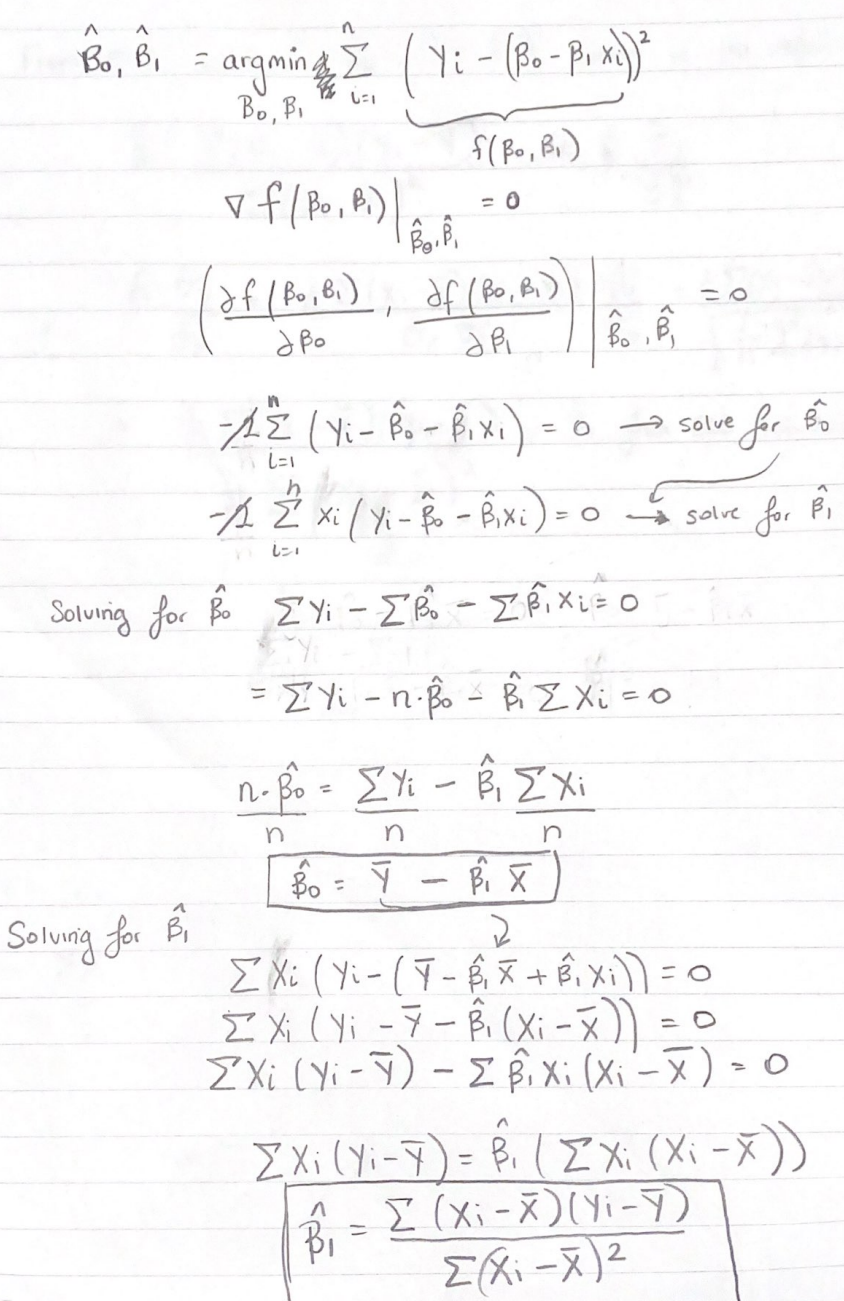

### Showing formulas given for B0 and B1 are correct
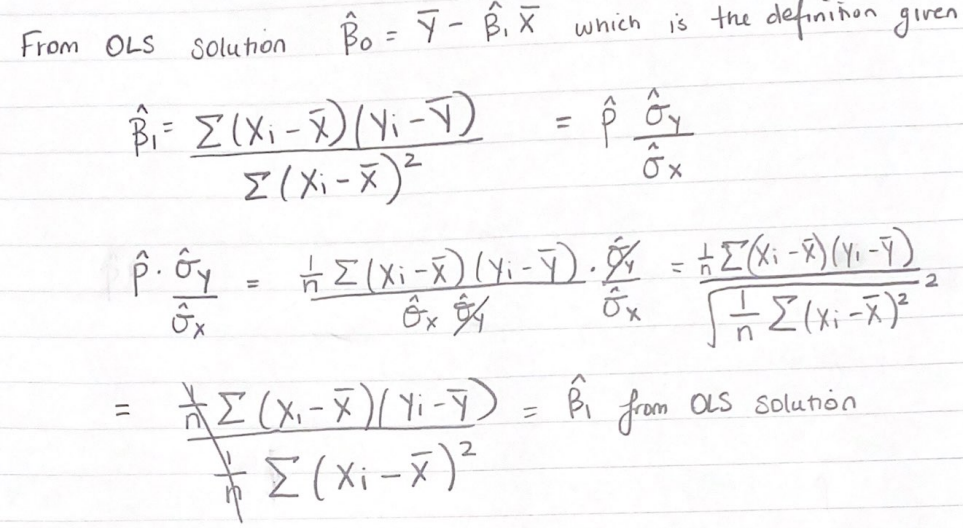

### 2B
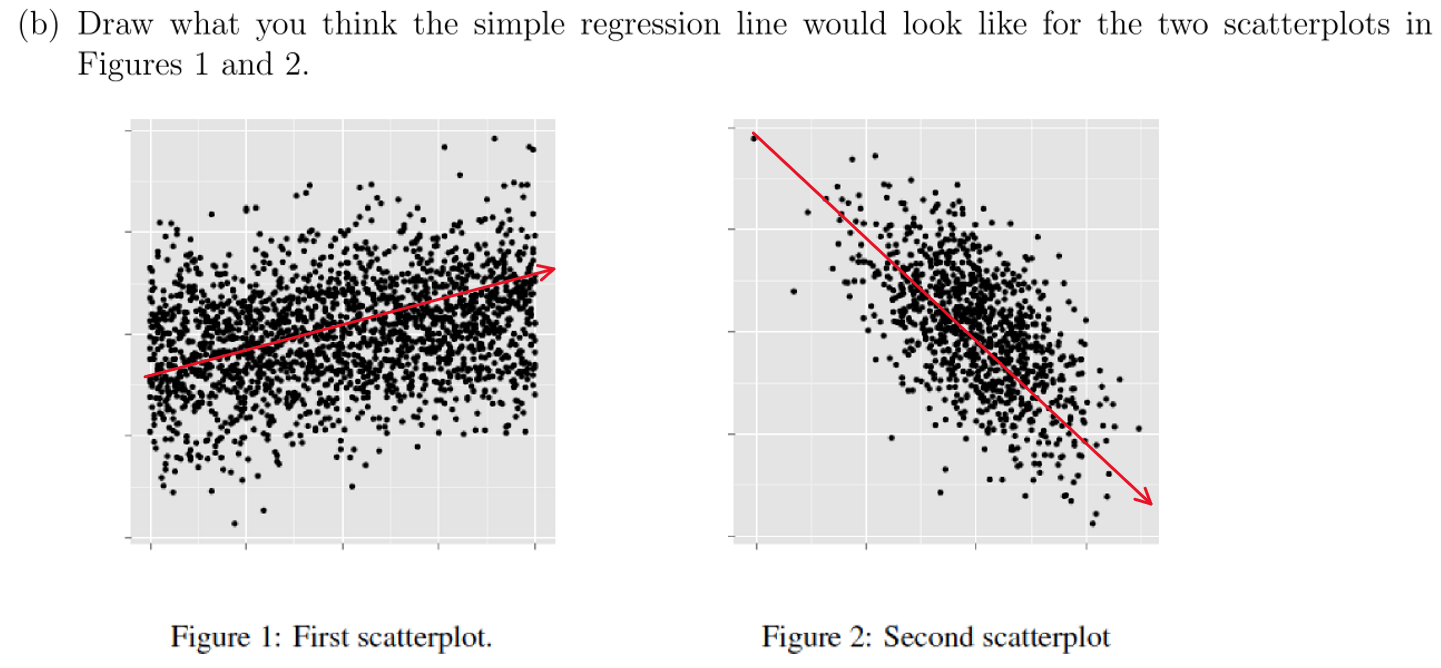

## Problem 3

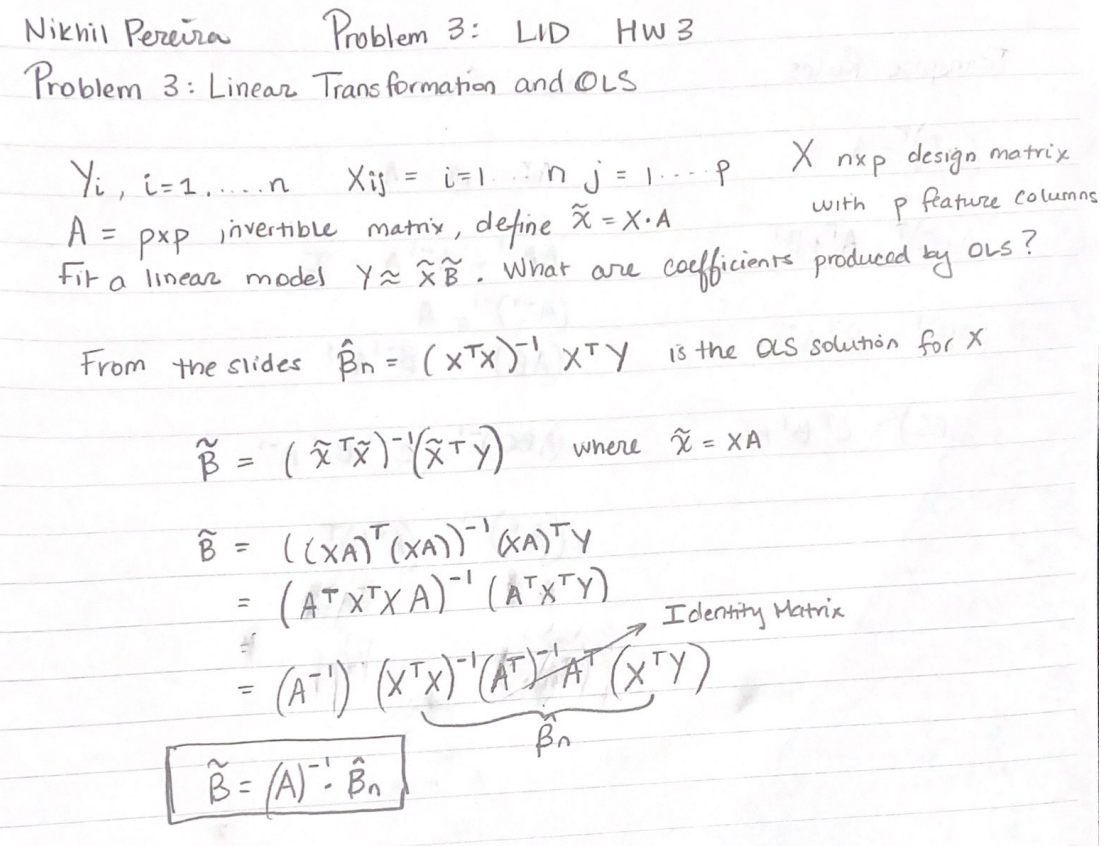